In [0]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"


from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext
import seaborn as sns
import pandas as pd
from IPython.display import YouTubeVideo
from google.colab import drive
drive.mount('/content/drive')

songs_metadata_file = 'https://static.turi.com/datasets/millionsong/song_data.csv'
song_df_2 = pd.read_csv(songs_metadata_file)
song_df_2['title']=song_df_2['title'].str.strip()
song_same = pd.read_csv('drive/My Drive/Ms Ciencia de datos/song-sim.csv') ## change
user_same = pd.read_csv('drive/My Drive/Ms Ciencia de datos/user-sim.csv') ## change

# create the Spark Session
spark = SparkSession.builder.getOrCreate()

# create the Spark Context
sc = spark.sparkContext

triplets_file = 'https://static.turi.com/datasets/millionsong/10000.txt'
song_df_1 = pd.read_table(triplets_file,header=None)
song_df_1.columns = ['user_id', 'song_id', 'listen_count']
song_df_1.to_csv('tripletas.csv')

     |████████████████████████████████| 217.8MB 58kB/s 
     |████████████████████████████████| 204kB 45.0MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=3fc81cebfa8de9601f79c295772592ec0e267c29efa7e6f15f8a04ef9c61d2b1
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark
openjdk-8-jdk-headless is already the newest version (8u242-b08-0ubuntu3~18.04).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Analisis correlación canciones

## Cuales son las canciones más parecidas?

En general las canciones más parecidas son canciones del mismo artista y mismo album.

In [0]:
song_df_2_2=song_df_2.copy()
#song_df_2_2.columns = ['song_id',]
parecidas = song_same.merge(song_df_2,on='song_id').merge(song_df_2,left_on='song_id_2',right_on='song_id').sort_values('Jackard')
parecidas.tail(10)

,Unnamed: 0,song_id_x,song_id_2,Jackard,title_x,release_x,artist_name_x,year_x,song_id_y,title_y,release_y,artist_name_y,year_y
43231,43047,SOJTWQT12AB018117B,SOZBARW12AB018118A,0.549451,SATORI,Live In Japan,Rodrigo y Gabriela,2006,SOZBARW12AB018118A,IXTAPA,Live In Japan,Rodrigo y Gabriela,2006
42638,30260,SOZBARW12AB018118A,SOJTWQT12AB018117B,0.549451,IXTAPA,Live In Japan,Rodrigo y Gabriela,2006,SOJTWQT12AB018117B,SATORI,Live In Japan,Rodrigo y Gabriela,2006
43221,8418,SOFEBGQ12AB017FAB6,SOTUJKY12AB018119F,0.562500,JUAN LOCO,Live In Japan,Rodrigo y Gabriela,2006,SOTUJKY12AB018119F,VIKING MAN,Live In Japan,Rodrigo y Gabriela,2008
44119,9159,SOTUJKY12AB018119F,SOFEBGQ12AB017FAB6,0.562500,VIKING MAN,Live In Japan,Rodrigo y Gabriela,2008,SOFEBGQ12AB017FAB6,JUAN LOCO,Live In Japan,Rodrigo y Gabriela,2006
27343,40114,SONFMXQ12AF72A8391,SORRCWF12A8C1414F0,0.576271,End Of The Road,Music For The Motion Picture Into The Wild,Eddie Vedder,2007,SORRCWF12A8C1414F0,Setting Forth,Music For The Motion Picture Into The Wild,Eddie Vedder,2007
27321,24036,SORRCWF12A8C1414F0,SONFMXQ12AF72A8391,0.576271,Setting Forth,Music For The Motion Picture Into The Wild,Eddie Vedder,2007,SONFMXQ12AF72A8391,End Of The Road,Music For The Motion Picture Into The Wild,Eddie Vedder,2007
27313,2676,SOMIMPH12A8C14152D,SONFMXQ12AF72A8391,0.648148,The Wolf,Music For The Motion Picture Into The Wild,Eddie Vedder,2007,SONFMXQ12AF72A8391,End Of The Road,Music For The Motion Picture Into The Wild,Eddie Vedder,2007
37088,40113,SONFMXQ12AF72A8391,SOMIMPH12A8C14152D,0.648148,End Of The Road,Music For The Motion Picture Into The Wild,Eddie Vedder,2007,SOMIMPH12A8C14152D,The Wolf,Music For The Motion Picture Into The Wild,Eddie Vedder,2007
40486,8950,SODGZMS12AB01884F5,SOOKHAJ12A58A7E737,0.658537,L'Esperanza,LEsperanza,Airscape,1999,SOOKHAJ12A58A7E737,You're In My Heart,Back Home Again,Rhonda Vincent,2001
40470,16323,SOOKHAJ12A58A7E737,SODGZMS12AB01884F5,0.658537,You're In My Heart,Back Home Again,Rhonda Vincent,2001,SODGZMS12AB01884F5,L'Esperanza,LEsperanza,Airscape,1999


In [0]:
YouTubeVideo('AoYjaiA4DVo')

In [0]:
YouTubeVideo('nttU4KbcC-A')

## Mi Banda favorita es X (Muse)... Cuales son las canciones más parecidas de ellos?

In [0]:
parecidas[(parecidas.artist_name_x=="Muse")].tail(4)

 Aparentemente todo lo de Muse se parece mucho a lo de Muse (bastante lógico, no?). Esto además es un buen resultado dado que en ningun momento sabiamos esto de la información con la que computamos las similaridades.

 ## Tambien nos podemos preguntar por cuales canciones son parecidas a Muse que no sean de Muse

In [0]:
parecidas[(parecidas.artist_name_y!="Muse") & (parecidas.artist_name_x=="Muse")].tail(4)

In [0]:
YouTubeVideo('dKiayHSR4DI')


In [0]:
YouTubeVideo('ENHhN7QhXS4')

## Cuales son las canciones más parecidas a mi canción favorita?

In [0]:
parecidas[(parecidas.title_x=="Butterflies and Hurricanes")].tail(10)

In [0]:

YouTubeVideo('hucz0qsXEUQ')



In [0]:
YouTubeVideo('XPYLIy3FWpk')

# Analisis similaridad de usuarios

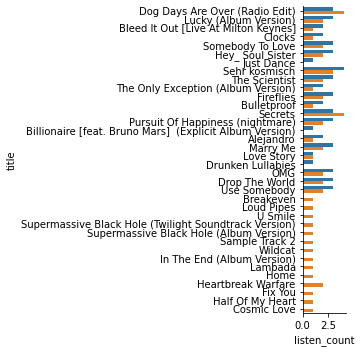

In [0]:
triplets_file = 'tripletas.csv'


song_df = spark.read.csv(triplets_file, header='true')
pareja=user_same.sort_values('Jackard').tail(5).head(1)
pareja=user_same[user_same.Jackard<0.95].sort_values('Jackard').tail(1)
u1=pareja.user_id.values[0]
u2=pareja.user_id_2.values[0]

listas=song_df.filter((song_df.user_id==u1) | (song_df.user_id==u2)).toPandas()
listas.listen_count = [int(x) for x in listas.listen_count ]
df = listas.merge(song_df_2,on='song_id')
df.to_csv('user_jack_95.csv')




sns.catplot(y = "title",       # x variable name
            x = "listen_count",       # y variable name
            hue = "user_id",  # elements in each group variable name
            data = df,     # dataframe to plot
            kind = "bar",
            legend=False)


In [0]:
pareja=user_same[user_same.Jackard<0.7].sort_values('Jackard').tail(1)
u1=pareja.user_id.values[0]
u2=pareja.user_id_2.values[0]

listas=song_df.filter((song_df.user_id==u1) | (song_df.user_id==u2)).toPandas()
listas.listen_count = [int(x) for x in listas.listen_count ]
df = listas.merge(song_df_2,on='song_id')
df.to_csv('user_jack_70.csv')

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (32,10))


ax = sns.catplot(y = "title",       # x variable name
            x = "listen_count",       # y variable name
            hue = "user_id",  # elements in each group variable name
            data = df,     # dataframe to plot
            kind = "bar",
            legend=False)

In [0]:
pareja=user_same[user_same.Jackard<0.5].sort_values('Jackard').tail(1)
u1=pareja.user_id.values[0]
u2=pareja.user_id_2.values[0]

listas=song_df.filter((song_df.user_id==u1) | (song_df.user_id==u2)).toPandas()
listas.listen_count = [int(x) for x in listas.listen_count ]
df = listas.merge(song_df_2,on='song_id')
df.to_csv('user_jack_50.csv')

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (32,10))


ax = sns.catplot(y = "title",       # x variable name
            x = "listen_count",       # y variable name
            hue = "user_id",  # elements in each group variable name
            data = df,     # dataframe to plot
            kind = "bar",
            legend=False)

In [0]:
pareja=user_same[user_same.Jackard<0.1].sort_values('Jackard').tail(1)
u1=pareja.user_id.values[0]
u2=pareja.user_id_2.values[0]

listas=song_df.filter((song_df.user_id==u1) | (song_df.user_id==u2)).toPandas()
listas.listen_count = [int(x) for x in listas.listen_count ]
df = listas.merge(song_df_2,on='song_id')
df.to_csv('user_jack_10.csv')

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (32,10))


ax = sns.catplot(y = "title",       # x variable name
            x = "listen_count",       # y variable name
            hue = "user_id",  # elements in each group variable name
            data = df,     # dataframe to plot
            kind = "bar",
            legend=False)